# IMPORTING LIBRARIES

In [24]:
#Installation of required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

In [25]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
#Reading the dataset
df = pd.read_csv("dataset.csv")

# EXPLORATORY DATA ANALYSIS

In [27]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,NaN,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1.0,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1.0,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,NaN,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [28]:
df.shape

(11055, 32)

In [29]:
#displaying column names
df.keys()

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        11055 non-null  int64  
 1   having_IPhaving_IP_Address   11055 non-null  int64  
 2   URLURL_Length                11055 non-null  int64  
 3   Shortining_Service           11055 non-null  int64  
 4   having_At_Symbol             10959 non-null  float64
 5   double_slash_redirecting     11055 non-null  int64  
 6   Prefix_Suffix                11055 non-null  int64  
 7   having_Sub_Domain            11055 non-null  int64  
 8   SSLfinal_State               11055 non-null  int64  
 9   Domain_registeration_length  11055 non-null  int64  
 10  Favicon                      11055 non-null  int64  
 11  port                         11055 non-null  int64  
 12  HTTPS_token                  11055 non-null  int64  
 13  Request_URL     

In [31]:
# Descriptive statistics of the data set accessed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,11055.0,5528.000000,3191.447947,1.0,2764.5,5528.0,8291.5,11055.0
having_IPhaving_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URLURL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,10959.0,0.703440,0.710787,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0


In [32]:
# Count of null values
df.isnull().sum()

index                           0
having_IPhaving_IP_Address      0
URLURL_Length                   0
Shortining_Service              0
having_At_Symbol               96
double_slash_redirecting        0
Prefix_Suffix                   0
having_Sub_Domain               0
SSLfinal_State                  0
Domain_registeration_length     0
Favicon                         0
port                            0
HTTPS_token                     0
Request_URL                     0
URL_of_Anchor                   0
Links_in_tags                   0
SFH                             0
Submitting_to_email             0
Abnormal_URL                    0
Redirect                        0
on_mouseover                    0
RightClick                      0
popUpWidnow                     0
Iframe                          0
age_of_domain                   0
DNSRecord                       0
web_traffic                     0
Page_Rank                       0
Google_Index                    0
Links_pointing

In [33]:
#The distribution of the Outcome variable was examined.
df["Result"].value_counts()*100/len(df)

 1    55.694256
-1    44.305744
Name: Result, dtype: float64

In [34]:
# The classes of the outcome variable were examined.
df.Result.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [35]:
# checking for duplicate rows
duplicated_rows = df[df.duplicated()]
duplicated_rows.shape

(0, 32)

In [36]:
df.corr()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,1.000000,-0.388317,0.006105,-0.006281,-0.171656,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IPhaving_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.159894,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.076100,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104115,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.171656,0.159894,-0.076100,0.104115,1.000000,0.087638,-0.012414,-0.059555,0.029881,0.017052,...,0.290989,0.283673,-0.004941,-0.048049,0.031678,-0.063462,0.035898,-0.004499,-0.080792,0.051330
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.087638,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.012414,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.059555,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.029881,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.017052,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


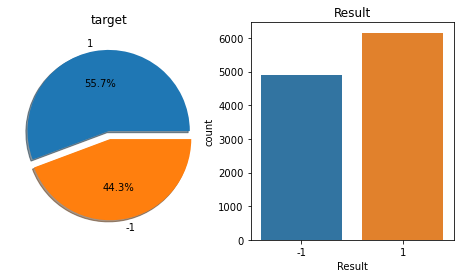

In [37]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(8,4))
df['Result'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Result',data=df,ax=ax[1])
ax[1].set_title('Result')
plt.show()

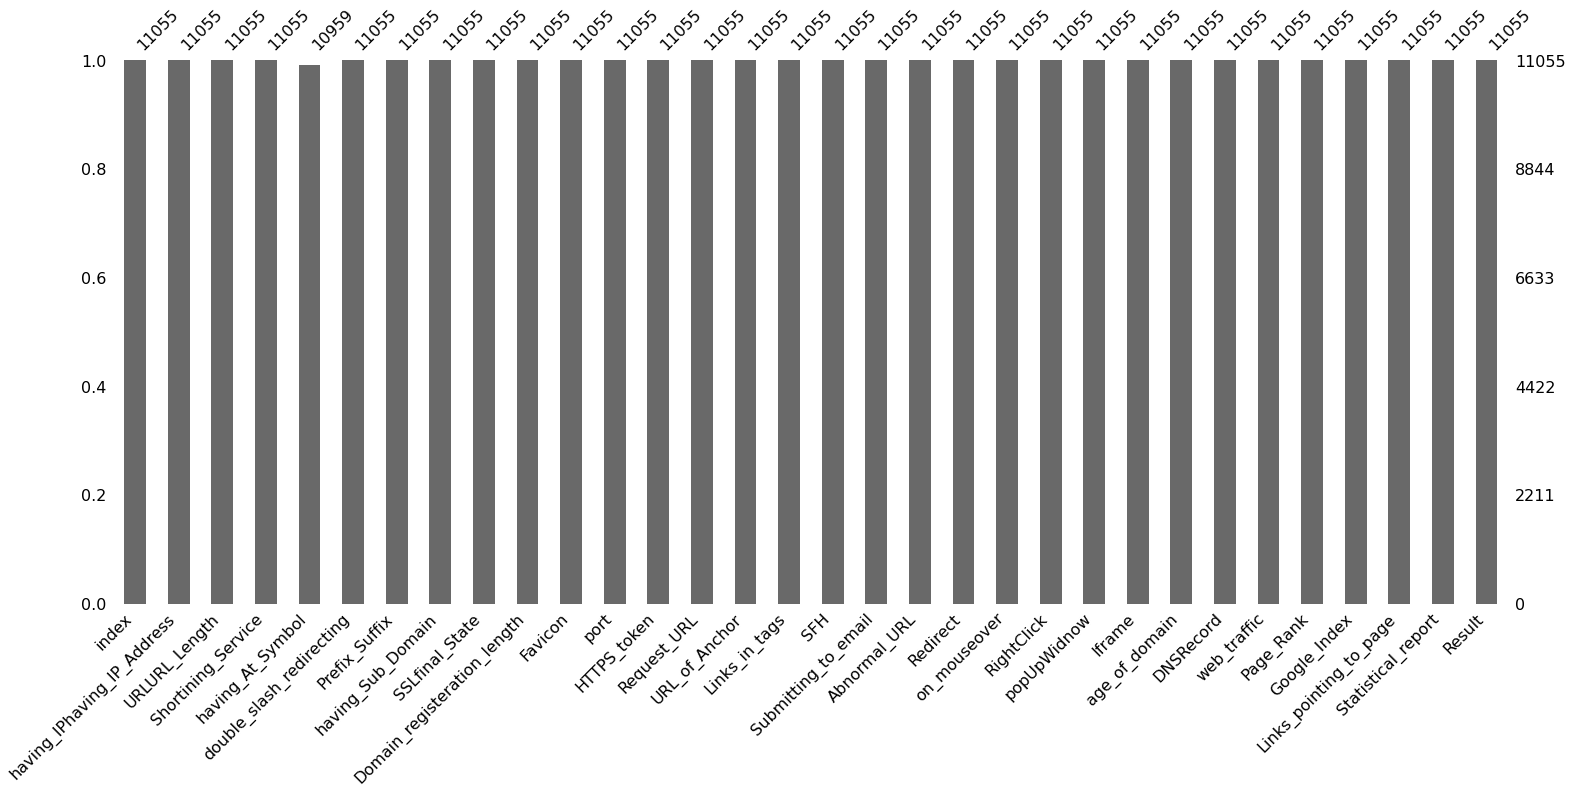

In [38]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df);

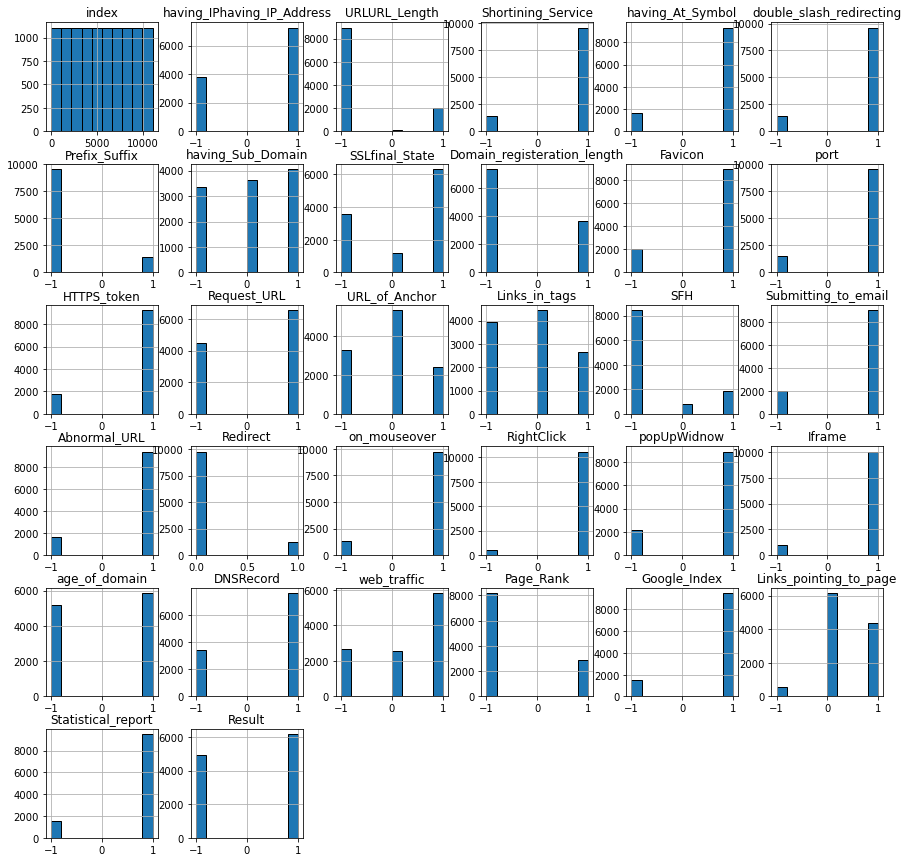

In [39]:
df.hist(bins=10, edgecolor = "black", figsize=(15,15))
plt.show()

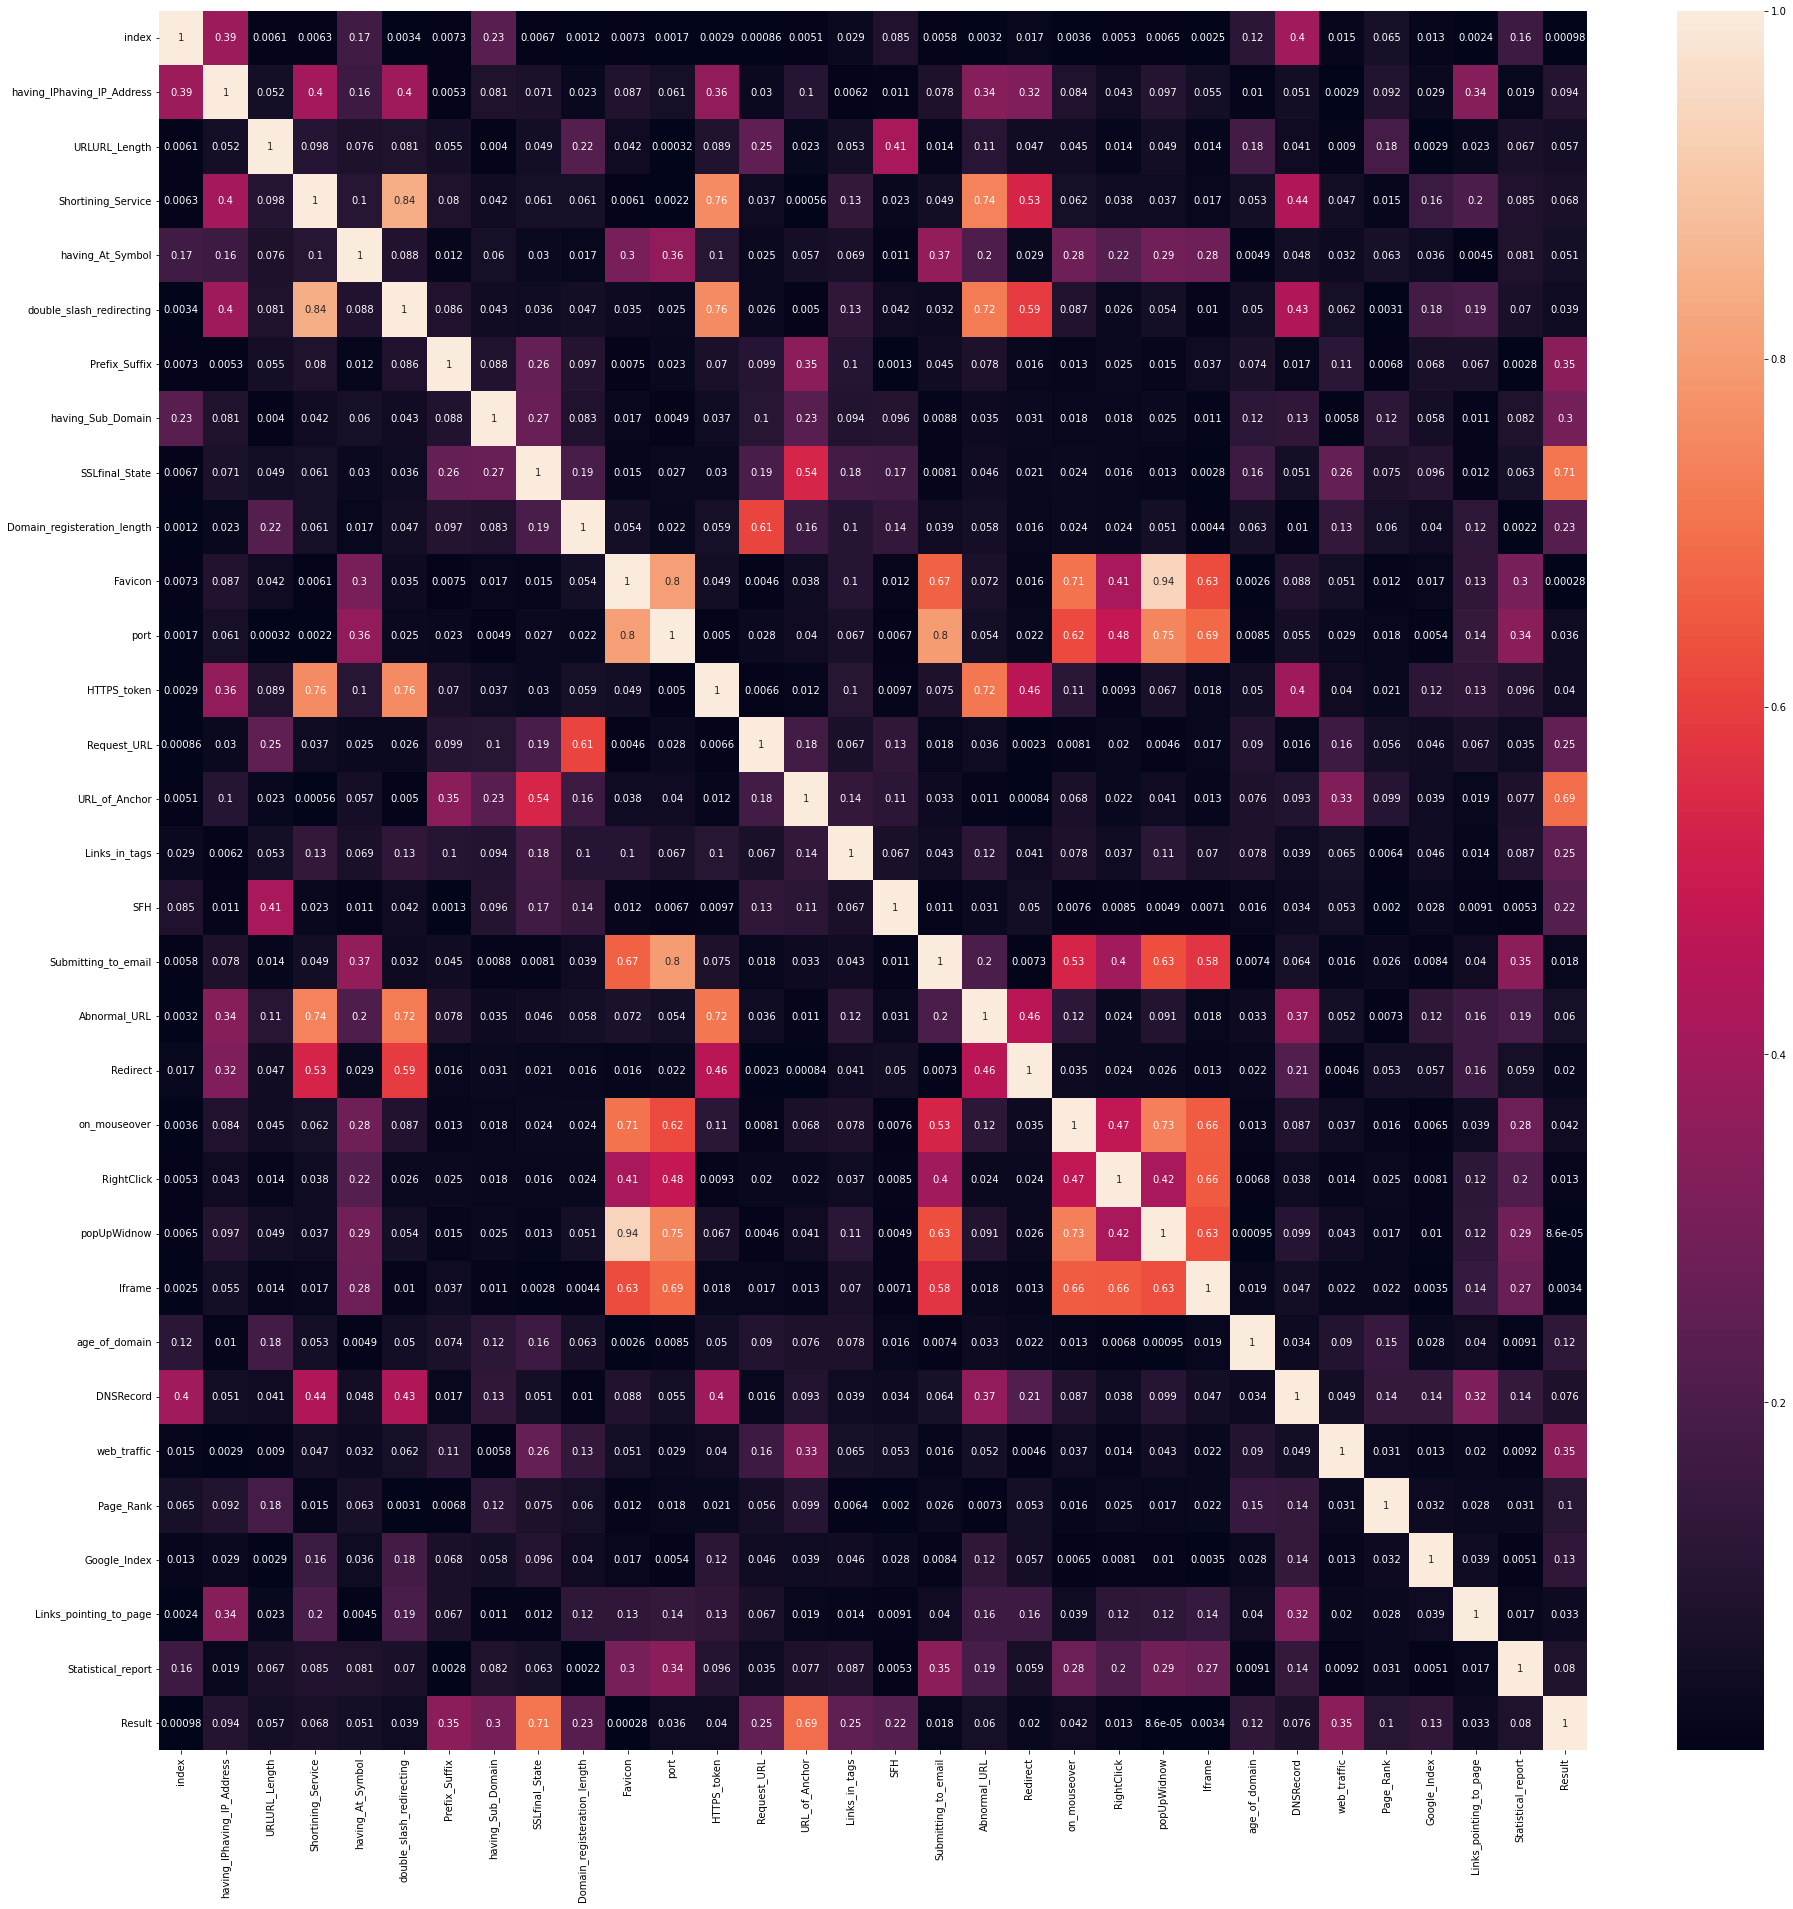

In [40]:
plt.figure(figsize=(32,32))
sns.heatmap(np.abs(df.corr()), annot=True);

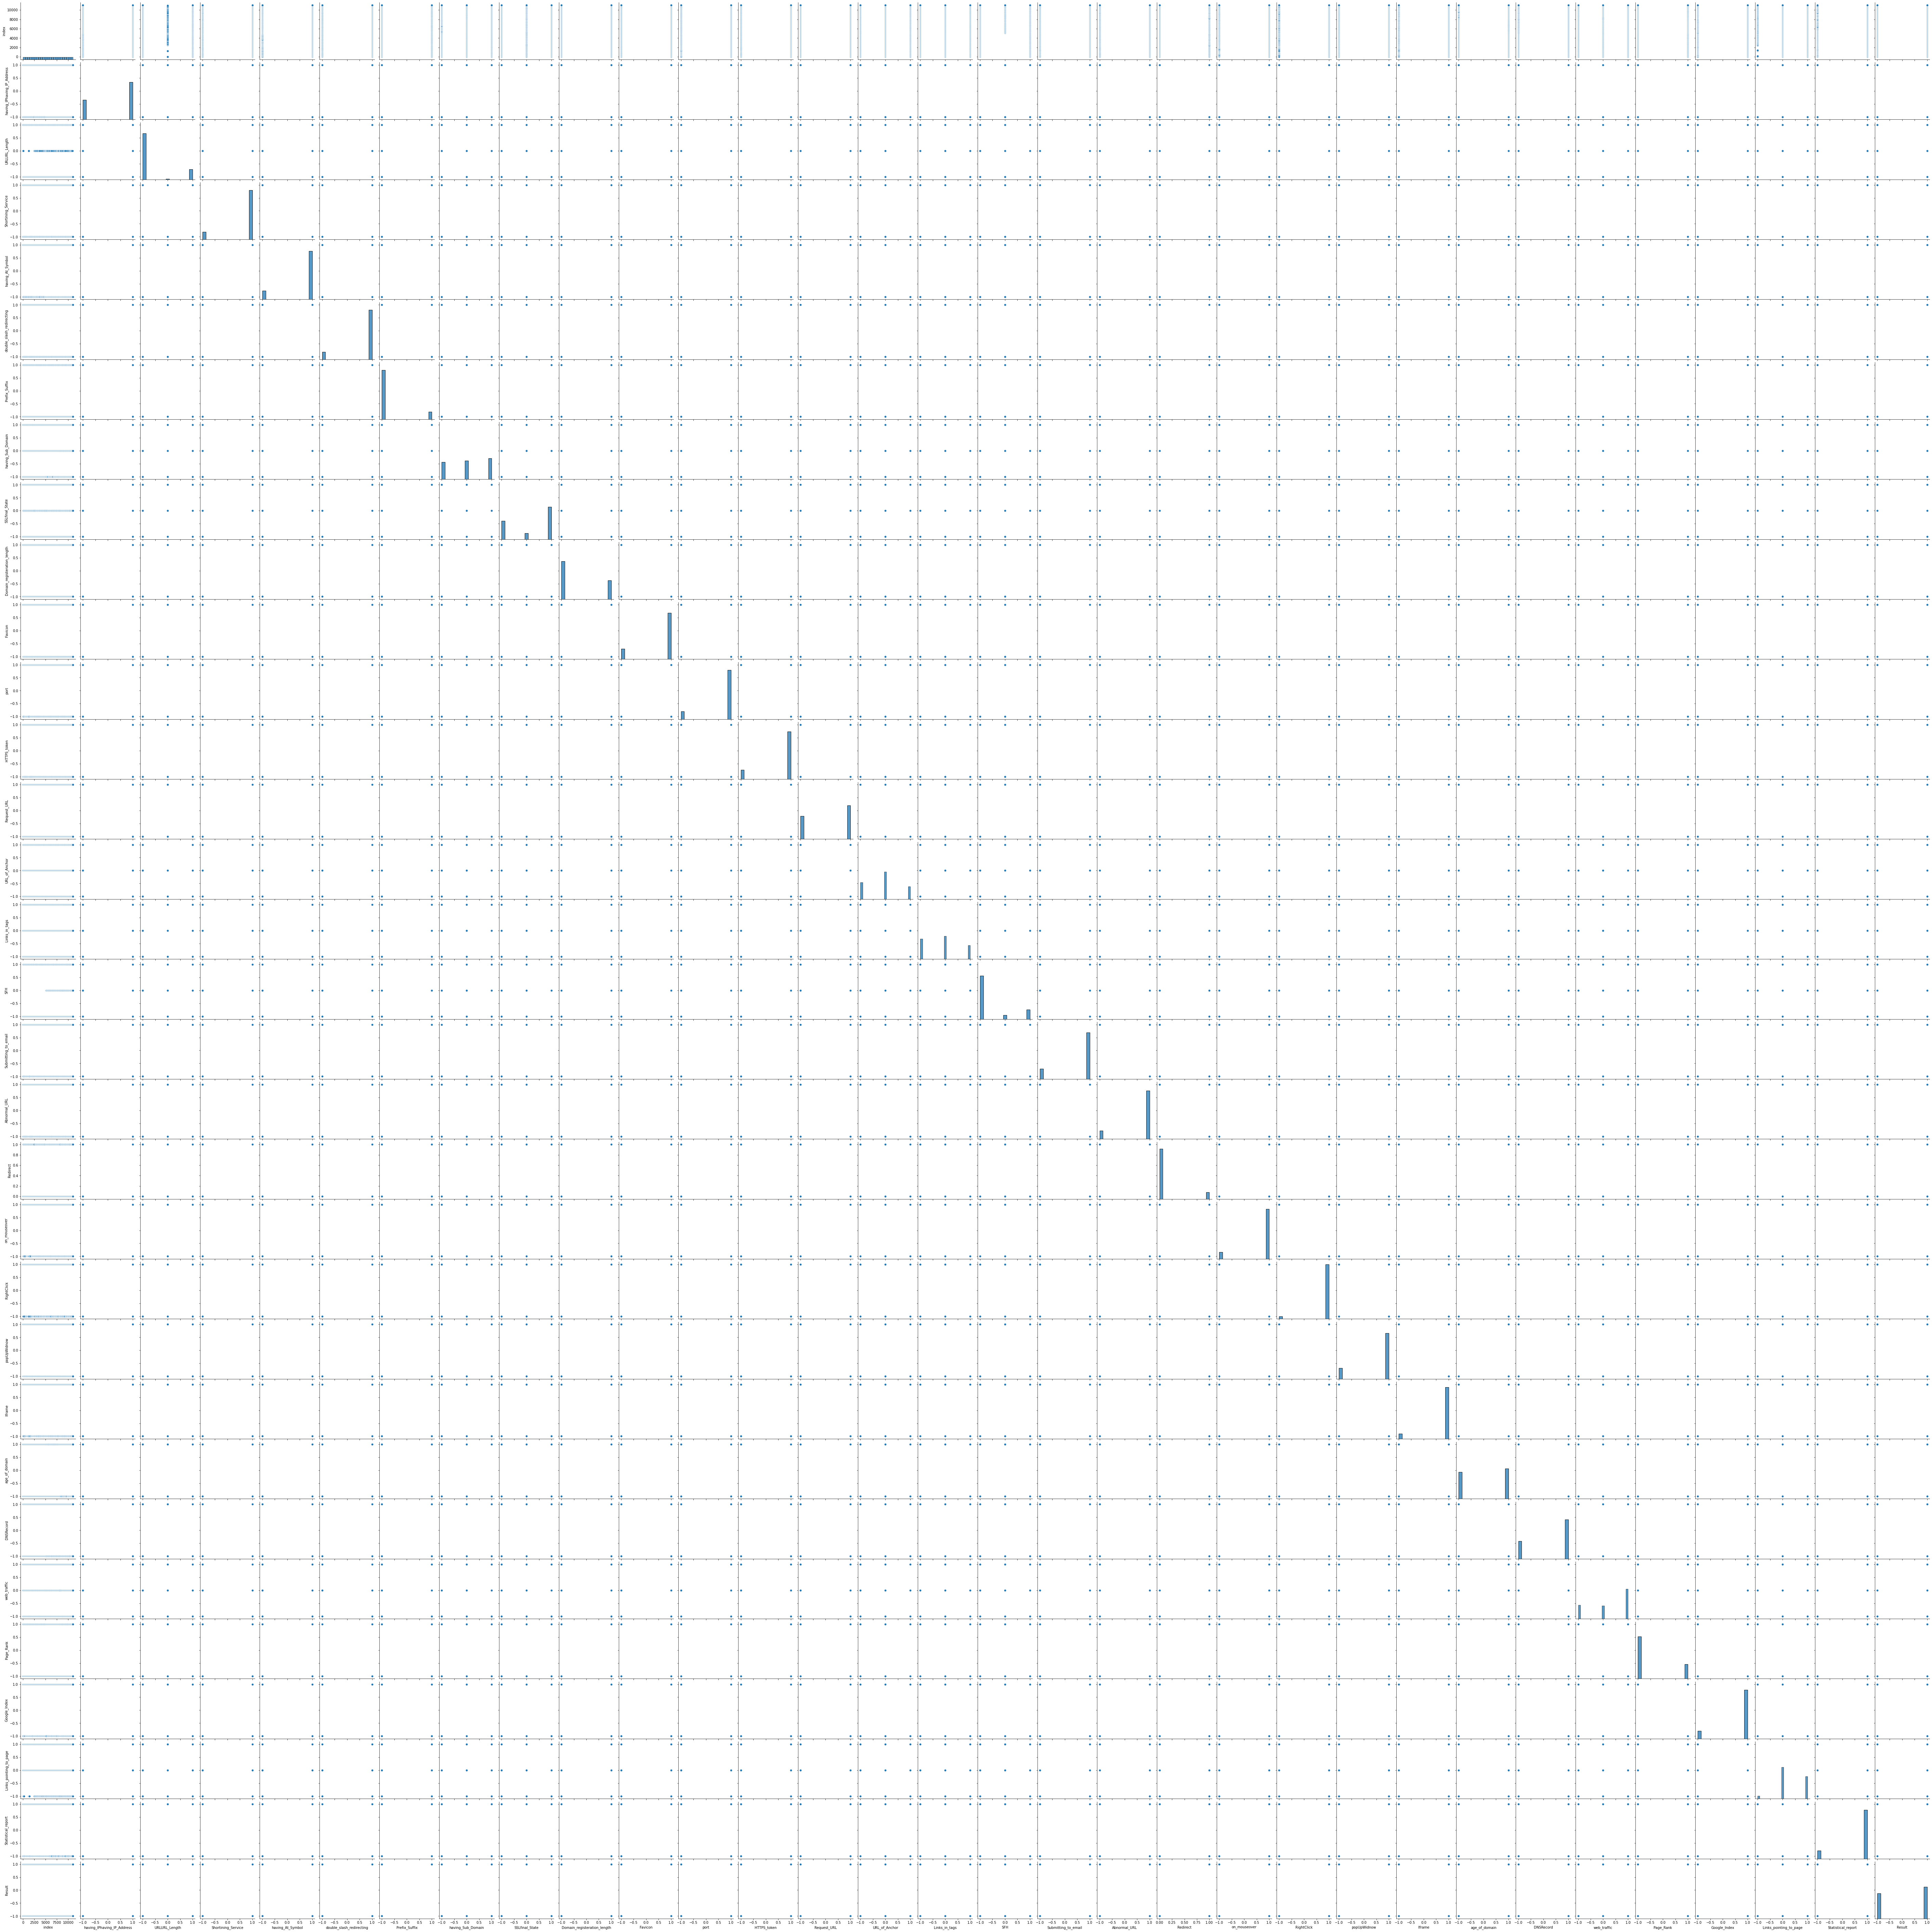

In [19]:
# Pairplot 
sns.pairplot(data = df)
plt.show()

# SPLITTING TH DATASET

In [41]:
#Removing the features which do not have much impact on Result
data=df.iloc[:,[1,2,3,4,5,6,12,20,21,22,23,24,25,30,31]]
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,HTTPS_token,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Statistical_report,Result
0,-1,1,1,NaN,-1,-1,-1,1,1,1,1,-1,-1,-1,-1
1,1,1,1,1.0,1,-1,-1,1,1,1,1,-1,-1,1,-1
2,1,0,1,1.0,1,-1,-1,1,1,1,1,1,-1,-1,-1
3,1,0,1,1.0,1,-1,-1,1,1,1,1,-1,-1,1,-1
4,1,0,-1,NaN,1,-1,1,-1,1,-1,1,-1,-1,1,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   having_IPhaving_IP_Address  11055 non-null  int64  
 1   URLURL_Length               11055 non-null  int64  
 2   Shortining_Service          11055 non-null  int64  
 3   having_At_Symbol            10959 non-null  float64
 4   double_slash_redirecting    11055 non-null  int64  
 5   Prefix_Suffix               11055 non-null  int64  
 6   HTTPS_token                 11055 non-null  int64  
 7   on_mouseover                11055 non-null  int64  
 8   RightClick                  11055 non-null  int64  
 9   popUpWidnow                 11055 non-null  int64  
 10  Iframe                      11055 non-null  int64  
 11  age_of_domain               11055 non-null  int64  
 12  DNSRecord                   11055 non-null  int64  
 13  Statistical_report          110

In [51]:
# Sepratating & assigning features and target columns to X & y
X=data.iloc[:,:13]
y=data.iloc[:,13]
X.shape, y.shape

((11055, 13), (11055,))

In [55]:
y

0       -1
1        1
2       -1
3        1
4        1
        ..
11050    1
11051    1
11052    1
11053    1
11054   -1
Name: Statistical_report, Length: 11055, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 12)

In [47]:
X_train

array([[ 1., -1.,  1., ...,  1.,  1.,  1.],
       [ 1., -1.,  1., ...,  1., -1., -1.],
       [-1., -1.,  1., ...,  1., -1.,  1.],
       ...,
       [ 1., -1.,  1., ...,  1.,  1.,  1.],
       [ 1., -1.,  1., ...,  1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1., -1., -1.]])

# MODEL BUILDING AND EVALUATION

# LOGISTIC REGRESSION

In [53]:
Logmodel = LogisticRegression()
Logmodel.fit(X_train, y_train)
y_prediction = Logmodel.predict(X_test)



accuracy1_LR = Logmodel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_LR * 100, "%")
accuracy2_LR = Logmodel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_LR * 100, "%")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [16]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_grid_LR = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}
grid_LR = GridSearchCV(LogisticRegression(),param_grid_LR, scoring='accuracy', n_jobs=-1, cv=5).fit(X_train,y_train)
print('Best Score: %s' % grid_LR.best_score_)
print('Best Hyperparameters: %s' % grid_LR.best_params_)

Best Score: 0.8895303479481977
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [17]:
Tuned_LR_model = LogisticRegression(**grid_LR.best_params_).fit(X_train, y_train)
Tuned_LR_y_prediction = Tuned_LR_model.predict(X_test)


HP_accuracy1_LR = Tuned_LR_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_LR * 100, "%")
HP_accuracy2_LR = Tuned_LR_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_LR * 100, "%")

Accuracy of train data =  89.08864767073722 %
Accuracy of test data =  88.69289914066033 %


Text(0.5, 15.0, 'Predicted label')

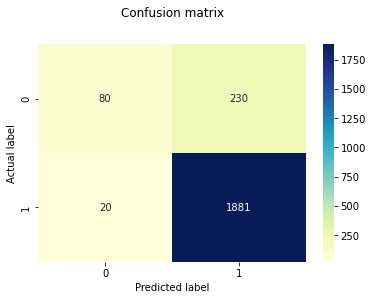

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_LR_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Tuned_LR_y_prediction))

              precision    recall  f1-score   support

          -1       0.80      0.26      0.39       310
           1       0.89      0.99      0.94      1901

    accuracy                           0.89      2211
   macro avg       0.85      0.62      0.66      2211
weighted avg       0.88      0.89      0.86      2211



# SVM

In [49]:
SvcModel = SVC()
#SvcModel = SVC(kernel = 'linear', random_state = 42)
SvcModel.fit(X_train, y_train)
y_prediction_SVM = SvcModel.predict(X_test)

accuracy1_SVM = SvcModel.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_SVM * 100, "%")
accuracy2_SVM = SvcModel.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_SVM * 100, "%")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [21]:
param_grid_SVM = {'C': [0.01,0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}
grid_SVM = GridSearchCV(SVC(), param_grid_SVM, refit = True,return_train_score=True, n_jobs=-1,cv=5).fit(X_train, y_train)

# print best parameter after tuning
print('Best Score: %s' % grid_SVM.best_score_)
print("BEST PARAMETER:",grid_SVM.best_params_) 

Best Score: 0.9034377246136964
BEST PARAMETER: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [22]:
Tuned_SVM_model = SVC(**grid_SVM.best_params_).fit(X_train, y_train)
Tuned_SVM_y_prediction= Tuned_SVM_model.predict(X_test)

HP_accuracy1_SVM = Tuned_SVM_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_SVM * 100, "%")
HP_accuracy2_SVM = Tuned_SVM_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_SVM * 100, "%")

Accuracy of train data =  91.29353233830845 %
Accuracy of test data =  90.45680687471732 %


Text(0.5, 15.0, 'Predicted label')

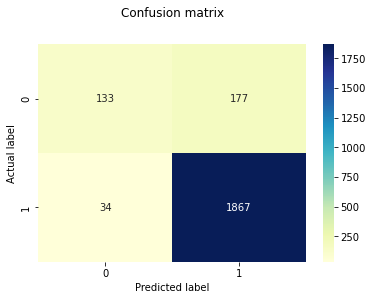

In [23]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_SVM_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Tuned_SVM_y_prediction))

              precision    recall  f1-score   support

          -1       0.80      0.43      0.56       310
           1       0.91      0.98      0.95      1901

    accuracy                           0.90      2211
   macro avg       0.85      0.71      0.75      2211
weighted avg       0.90      0.90      0.89      2211



# DECISION TREE

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train , y_train)
y_pred_decision_tree = decision_tree.predict(X_test)


accuracy1_DT = decision_tree.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_DT * 100, "%")
accuracy2_DT = decision_tree.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_DT * 100, "%")

Accuracy of train data =  91.29353233830845 %
Accuracy of test data =  90.14020805065581 %


In [26]:
param_grid_DT = {'criterion': ["gini", "entropy"], 
              'splitter': ["best", "random"], 
              'max_depth': [1, 2, 3], 
              'min_samples_split': [2, 3, 4]}
grid_DT = GridSearchCV(DecisionTreeClassifier(), param_grid_DT, cv=5, n_jobs=-1,scoring = 'accuracy' ).fit(X_train,y_train)


print ("Best score is:",grid_DT.best_score_) 
print ("BEST PARAMETERS:",grid_DT.best_params_)

Best score is: 0.8876081023355988
BEST PARAMETERS: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [27]:
Tuned_DT_model = DecisionTreeClassifier(**grid_DT.best_params_).fit(X_train,y_train)
Tuned_DT_y_prediction= Tuned_DT_model.predict(X_test)

HP_accuracy1_DT = Tuned_DT_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_DT * 100, "%")
HP_accuracy2_DT = Tuned_DT_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_DT * 100, "%")

Accuracy of train data =  88.6250565355043 %
Accuracy of test data =  88.2858435097241 %


Text(0.5, 15.0, 'Predicted label')

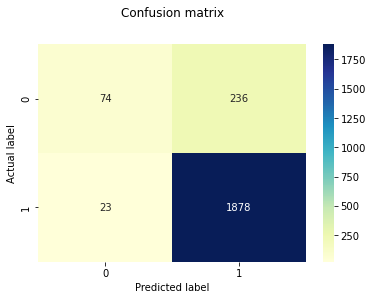

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_DT_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,Tuned_DT_y_prediction))

              precision    recall  f1-score   support

          -1       0.76      0.24      0.36       310
           1       0.89      0.99      0.94      1901

    accuracy                           0.88      2211
   macro avg       0.83      0.61      0.65      2211
weighted avg       0.87      0.88      0.86      2211



# NAIVE BAYES

In [30]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train , y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)

accuracy1_NB = naive_bayes.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_NB * 100, "%")
accuracy2_NB = naive_bayes.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_NB * 100, "%")

Accuracy of train data =  82.86974219810041 %
Accuracy of test data =  82.85843509724107 %


In [31]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(GaussianNB(), param_grid=params_NB, cv=5, scoring='accuracy').fit(X_train,y_train)


print ("Best score is:",grid_NB.best_score_) 
print ("BEST PARAMETERS:",grid_NB.best_params_)

Best score is: 0.8723441548641894
BEST PARAMETERS: {'var_smoothing': 1.0}


In [32]:
Tuned_NB_model = GaussianNB(**grid_NB.best_params_).fit(X_train,y_train)
Tuned_NB_y_prediction= Tuned_NB_model.predict(X_test)
HP_accuracy1_NB = Tuned_NB_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_NB * 100, "%")
HP_accuracy2_NB = Tuned_NB_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_NB * 100, "%")

Accuracy of train data =  87.3699683401176 %
Accuracy of test data =  87.38127544097694 %


Text(0.5, 15.0, 'Predicted label')

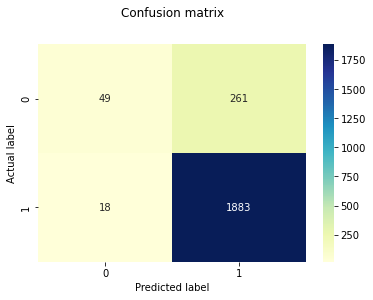

In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_NB_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:

from sklearn.metrics import classification_report
print(classification_report(y_test, Tuned_NB_y_prediction))

              precision    recall  f1-score   support

          -1       0.73      0.16      0.26       310
           1       0.88      0.99      0.93      1901

    accuracy                           0.87      2211
   macro avg       0.80      0.57      0.60      2211
weighted avg       0.86      0.87      0.84      2211



# RANDOM FOREST

In [35]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train , y_train)
y_pred_Random_Forest = Random_Forest.predict(X_test)


accuracy1_RF = Random_Forest.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_RF * 100, "%")
accuracy2_RF = Random_Forest.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_RF * 100, "%")

Accuracy of train data =  91.29353233830845 %
Accuracy of test data =  90.32112166440524 %


In [36]:
param_grid_RF = {'bootstrap': [True],
    'max_depth': [80, 90, 100,110],
    'criterion' : ('gini','entropy'),
    'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [ 200, 300, 1000]}
grid_RF = GridSearchCV(RandomForestClassifier(), param_grid_RF, cv=5, n_jobs=-1,scoring = 'accuracy' ).fit(X_train,y_train)


print ("Best score is:",grid_RF.best_score_) 
print ("BEST PARAMETERS:",grid_RF.best_params_)

Best score is: 0.9033245384947909
BEST PARAMETERS: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 90, 'max_features': 3, 'n_estimators': 1000}


In [37]:
Tuned_RF_model = RandomForestClassifier(**grid_RF.best_params_).fit(X_train,y_train)
Tuned_RF_y_prediction= Tuned_RF_model.predict(X_test)

HP_accuracy1_RF = Tuned_RF_model.score(X_train, y_train)
print("Accuracy of train data = ", HP_accuracy1_RF * 100, "%")
HP_accuracy2_RF = Tuned_RF_model.score(X_test, y_test)
print("Accuracy of test data = ", HP_accuracy2_RF * 100, "%")

Accuracy of train data =  91.29353233830845 %
Accuracy of test data =  90.59249208502939 %


Text(0.5, 15.0, 'Predicted label')

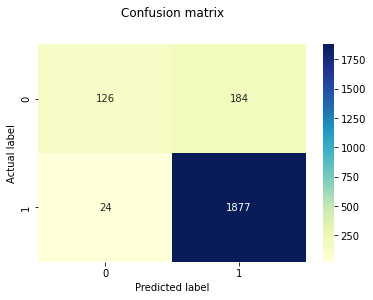

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, Tuned_RF_y_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Tuned_RF_y_prediction))

              precision    recall  f1-score   support

          -1       0.84      0.41      0.55       310
           1       0.91      0.99      0.95      1901

    accuracy                           0.91      2211
   macro avg       0.88      0.70      0.75      2211
weighted avg       0.90      0.91      0.89      2211



# STACKING

>lr 0.889 (0.005)
>dt 0.903 (0.005)
>svm 0.904 (0.005)
>rf 0.904 (0.005)
>stacking 0.904 (0.005)


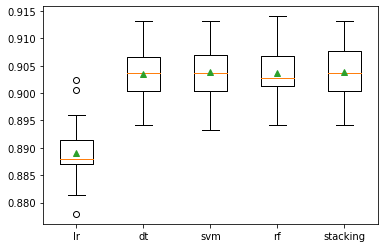

In [47]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std

def get_models():
    models = dict()
    models['lr'] = LogisticRegression(C=100,penalty='none',solver='newton-cg')
    models['dt'] = DecisionTreeClassifier()
    models['svm'] = SVC(C=100, gamma=0.1, kernel='rbf')
    models['rf']  = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=80, max_features= 3,n_estimators=300)
    #models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models


# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression(C=100,penalty='none',solver='newton-cg')))
    level0.append(('dt', DecisionTreeClassifier()))
    level0.append(('svm', SVC(C=100, gamma=0.1, kernel='rbf')))
    level0.append(('rf', RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=80, max_features= 3,n_estimators=300)))
    #level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)
    return model

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# COMPARISION

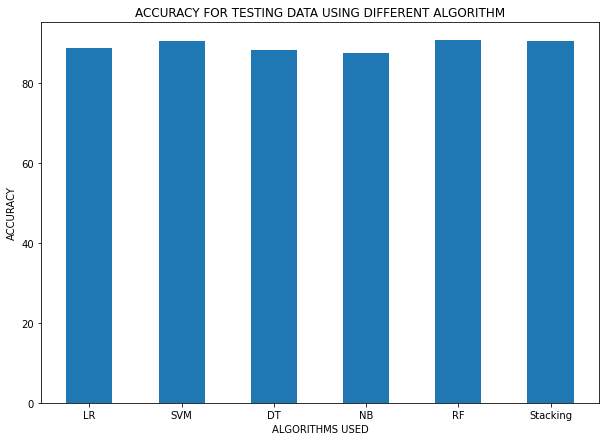

In [48]:
data_dict = {'LR':88.69, 'SVM':90.45, 'DT':88.28,'NB':87.38, 'RF':90.59,'Stacking':90.4}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 7))
#  Bar plot
plt.bar(courses, values,width = 0.5)
plt.xlabel("ALGORITHMS USED")
plt.ylabel("ACCURACY")
plt.title("ACCURACY FOR TESTING DATA USING DIFFERENT ALGORITHM")
plt.show()


# SAVING THE MODEL

In [58]:
import pickle
pickle.dump(Tuned_RF_model, open('Fianl_RF_model.pkl','wb'))